In [34]:
# lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
from random import shuffle
import random
# from tqdm import *
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam

In [35]:
!pip install tqdm

In [36]:
from tqdm import *

In [37]:
train = pd.read_csv('data/sign_mnist_train.csv')
test = pd.read_csv('data/sign_mnist_test.csv')

Text(0.5, 1.0, 'Label')

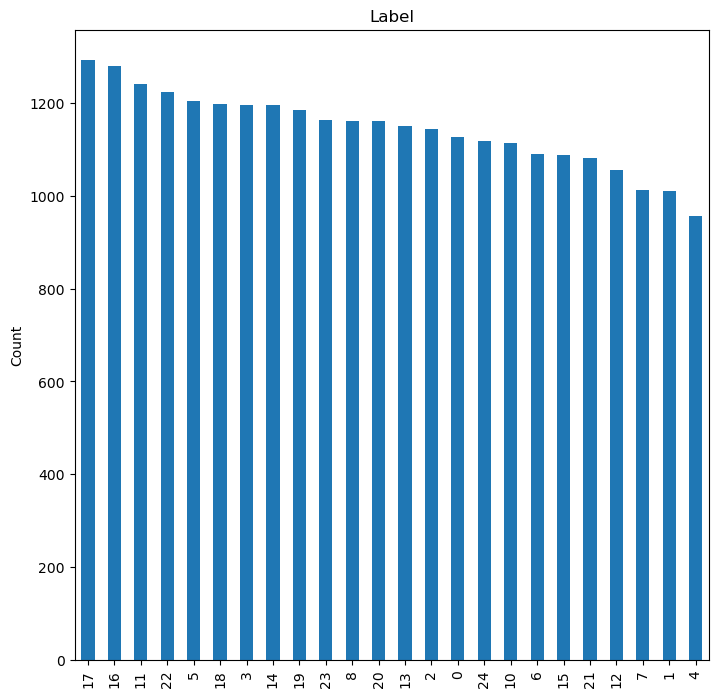

In [38]:
# visualization 
fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(221)
train['label'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Label')
# không cần tăng cường dữ liệu

In [39]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [40]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [41]:
# lấy cột labels
labels = np.unique(np.array(train.label.values))
labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [42]:
train_data = train.iloc[:,1:].values
test_data = test.iloc[:,1:].values
train_label = train['label'].values
test_label = test['label'].values

# reshape images to 28x28 and normalize data
train_data = np.array(train_data).reshape((-1, 1, 28, 28)).astype(np.uint8) / 255.0
test_data = np.array(test_data).reshape((-1, 1, 28, 28)).astype(np.uint8) / 255.0

test ảnh index = 25961
onhot vector
19


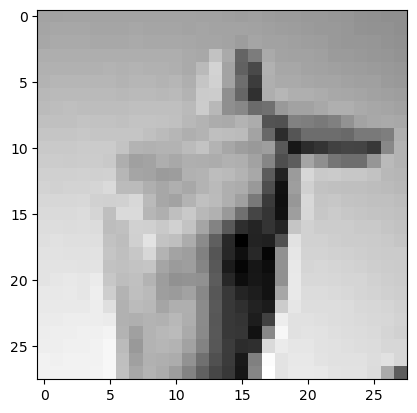

In [43]:
x = random.randint(0,train.shape[0])

print("test ảnh index = {}".format(x))
print("onhot vector")
print(train_label[x])
plt.imshow(train_data[x].reshape(28,28), cmap='gray')

In [44]:
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, 2, activation='relu', input_shape=(28,28,1)))
    model.add(Conv2D(64, 2, activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(32, 2, activation='relu'))
    model.add(Conv2D(64, 2, activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(32, 2, activation='relu'))
    model.add(Conv2D(64, 2, activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(25, activation='softmax'))
    model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])
    
    return model

In [45]:
cnn_model1 = cnn_model()
print(cnn_model1.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 27, 27, 32)        160       
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 64)        8256      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 32)        8224      
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        8256      
                                                      

In [46]:
X_train = np.array([i[0] for i in train_data]).reshape([-1, 28, 28, 1])
y_train = to_categorical(train_label, 25).astype(np.uint8)

X_test = np.array([i[0] for i in test_data]).reshape([-1, 28, 28, 1])
y_test_b = to_categorical(test_label, 25).astype(np.uint8)

history = cnn_model1.fit(X_train,
                    y_train,
                    batch_size = 128,
                    epochs = 10,
                    verbose = 1,
                    validation_data = (X_test, y_test_b))
cnn_model1.save('CNN_model.h5')

Epoch 1/10
215/215 [==============================] - 29s 124ms/step - loss: 2.8268 - acc: 0.1316 - val_loss: 2.0552 - val_acc: 0.3560
Epoch 2/10
215/215 [==============================] - 26s 121ms/step - loss: 1.5680 - acc: 0.4752 - val_loss: 0.9738 - val_acc: 0.6415
Epoch 3/10
215/215 [==============================] - 24s 114ms/step - loss: 0.8595 - acc: 0.6984 - val_loss: 0.5816 - val_acc: 0.7819
Epoch 4/10
215/215 [==============================] - 28s 128ms/step - loss: 0.5751 - acc: 0.7958 - val_loss: 0.4334 - val_acc: 0.8450
Epoch 5/10
215/215 [==============================] - 25s 115ms/step - loss: 0.4342 - acc: 0.8436 - val_loss: 0.3918 - val_acc: 0.8533
Epoch 6/10
215/215 [==============================] - 24s 112ms/step - loss: 0.3377 - acc: 0.8794 - val_loss: 0.2883 - val_acc: 0.8866
Epoch 7/10
215/215 [==============================] - 25s 117ms/step - loss: 0.2690 - acc: 0.9032 - val_loss: 0.2618 - val_acc: 0.9074
Epoch 8/10
215/215 [==============================] - 2

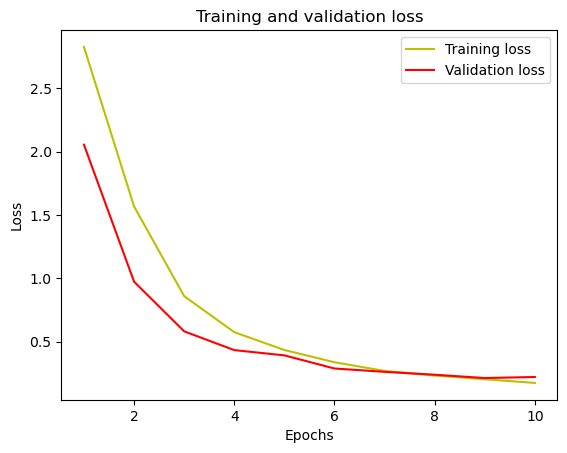

In [47]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

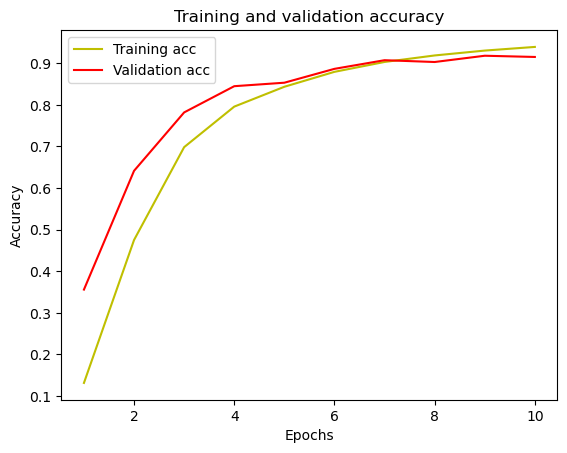

In [48]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [49]:
class_names = {1:'A', 
               2:'B', 
               3:'C', 
               4:'D', 
               5:'E', 
               5:'F', 
               6:'G',
               7:'H',
               8:'I',
               9:'J',
               10:'K',
               11:'L',
               12:'M',
               13:'N',
               14:'O',
               15:'P',
               16:'Q',
               17:'R',
               18:'S',
               19:'T',
               20:'U',
               21:'V',
               22:'W',
               23:'X',
               24:'Y' }

225/225 [==============================] - 2s 7ms/step - loss: 0.2211 - acc: 0.9152
Loss = 0.2210931032896042
Test Accuracy = 0.9152258634567261
Predicted Label:  D
True Label:  D


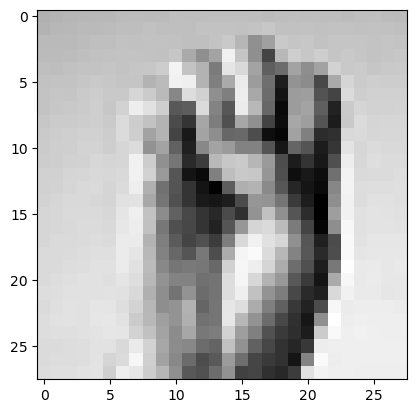

In [56]:
prediction = cnn_model1.predict(X_test) 
classes = np.argmax(prediction,axis=1)

pred =  cnn_model1.evaluate(X_test, y_test_b)
print ("Loss = " + str(pred[0]))
print ("Test Accuracy = " + str(pred[1]))

y_test = test_label
i = random.randint(1,len(prediction))
plt.imshow(X_test[i,:,:,0], cmap='gray') 
print("Predicted Label: ", class_names[classes[i]])
print("True Label: ", class_names[(y_test[i])])